In [25]:
from google.colab import files
import pandas as pd
import os
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import zipfile
import urllib.request
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [21]:
mydata= pd.read_csv("Crop_Recommendation.csv")
print (mydata)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('Crop_Recommendation.csv')

# Extract features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of values for k (from 1 to 50) and initialize variables to store the best k and its corresponding accuracy
best_k = None
best_accuracy = 0.0

# Perform 5-fold cross-validation on the training set to find the best k
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf)
    mean_accuracy = np.mean(scores)

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

print("Best k:", best_k)

# Train a k-NN classifier with the best k on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the k-NN classifier on the test set and report the accuracy
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)



Best k: 1
Test set accuracy: 0.9659090909090909


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


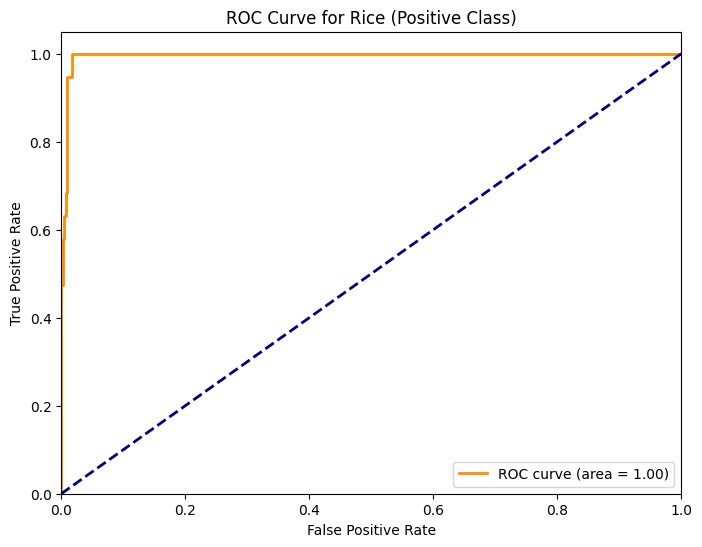

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load your dataset
data = pd.read_csv('Crop_Recommendation.csv')  # Replace 'your_dataset.csv' with the actual filename

# Extract features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Convert the labels into a binary classification task (rice versus non-rice)
y = np.where(y == 'rice', 1, 0)

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier using the training set
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict probabilities for the positive class ('rice') on the test set
y_prob = logistic_regression.predict_proba(X_test)[:, 1]  # Probability of class 1 ('rice')

# Compute the ROC curve for the positive class and calculate the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rice (Positive Class)')
plt.legend(loc='lower right')
plt.show()

SVM Classifier Accuracy: 0.9838565022421525
Confusion Matrix (SVM):
 [[969   3]
 [ 15 128]]
Random Forest Classifier Accuracy: 0.9811659192825112
Confusion Matrix (Random Forest):
 [[972   0]
 [ 21 122]]


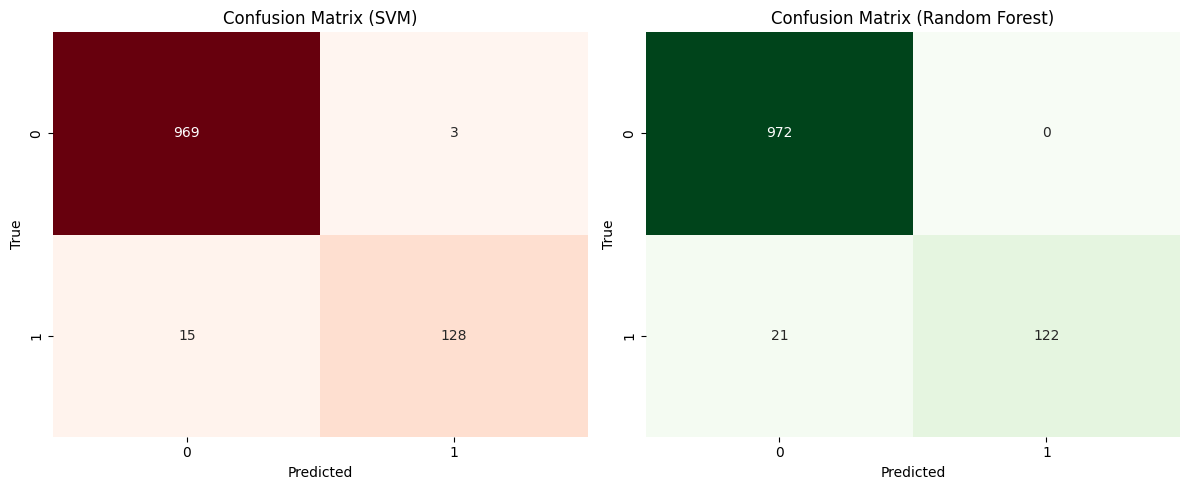

In [26]:
# Download the ZIP file and extract 'SMSSpamCollection'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
with urllib.request.urlopen(url) as response:
    with open('sms_spam_data.zip', 'wb') as out_file:
        out_file.write(response.read())

with zipfile.ZipFile('sms_spam_data.zip', 'r') as zip_ref:
    zip_ref.extract('SMSSpamCollection', path='./')

# Load the dataset
data = pd.read_csv('./SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Convert labels to binary (spam: 1, ham: 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=32)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=32)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Generate and display the confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", svm_accuracy)
print("Confusion Matrix (SVM):\n", svm_confusion_matrix)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=32)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Generate and display the confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Confusion Matrix (Random Forest):\n", rf_confusion_matrix)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()
